In [0]:
import numpy as np

In [0]:
#extracting data from csv files into numpy arrays
from numpy import genfromtxt
x_train = genfromtxt('train_data1.csv', delimiter=',')
y_train = genfromtxt('train_labels1.csv', delimiter=',')
x_test = genfromtxt('test_data1.csv', delimiter=',')
y_test = genfromtxt('test_labels1.csv', delimiter=',')

In [0]:
#shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((480, 200), (121, 200), (480,), (121,))

In [0]:
#converting to one hot
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)
y_train.shape,y_test.shape

Using TensorFlow backend.


((480, 7), (121, 7))

In [0]:
#reshaping to 2D 
x_train=np.reshape(x_train,(x_train.shape[0], 40,5))
x_test=np.reshape(x_test,(x_test.shape[0], 40,5))
x_train.shape,x_test.shape

((480, 40, 5), (121, 40, 5))

In [0]:
#reshaping to shape required by CNN
x_train=np.reshape(x_train,(x_train.shape[0], 40,5,1))
x_test=np.reshape(x_test,(x_test.shape[0], 40,5,1))

In [0]:
#shapes
x_train.shape,x_test.shape

((480, 40, 5, 1), (121, 40, 5, 1))

In [1]:
from keras import Sequential
from keras import optimizers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

Using TensorFlow backend.


In [0]:
#forming model
model=Sequential()

In [3]:
#adding layers and forming the model
model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(40,5,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(7,activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
from keras.utils import plot_model
plot_model(model, to_file='CNNmodel.png')

In [0]:
#compiling
model.compile(optimizer=optimizers.Adam(lr=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [0]:
#training the model
history = model.fit(x_train,y_train,batch_size=50,epochs=15,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 480 samples, validate on 121 samples
Epoch 1/15
480/480 [==============================] - 8s 16ms/step - loss: 2.6440 - acc: 0.2125 - val_loss: 1.3707 - val_acc: 0.6942
Epoch 2/15
480/480 [==============================] - 4s 7ms/step - loss: 1.3875 - acc: 0.4583 - val_loss: 0.6741 - val_acc: 0.8099
Epoch 3/15
480/480 [==============================] - 6s 12ms/step - loss: 0.7632 - acc: 0.7292 - val_loss: 0.3853 - val_acc: 0.7934
Epoch 4/15
480/480 [==============================] - 5s 10ms/step - loss: 0.4470 - acc: 0.8604 - val_loss: 0.0893 - val_acc: 0.9835
Epoch 5/15
480/480 [==============================] - 6s 12ms/step - loss: 0.2110 - acc: 0.9458 - val_loss: 0.0340 - val_acc: 1.0000
Epoch 6/15
480/480 [==============================] - 6s 11ms/step - loss: 0.1088 - acc: 0.9688 - val_loss: 0.0670 - val_acc: 0.9752
Epoch 7/15
480/480 [==============================] - 5s 11ms/step - loss: 0.0738 - acc: 0.9771 - val_loss: 0

In [0]:
#Saving the model
import h5py
model.save('CNNmodel.h5')


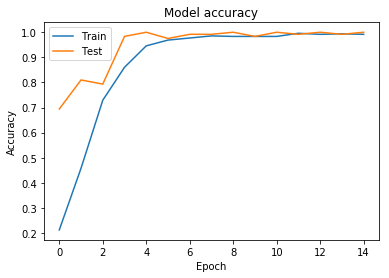

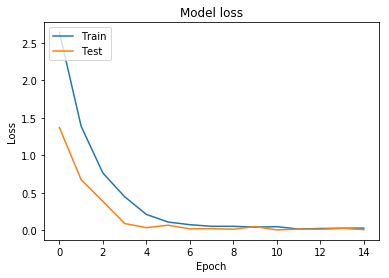

In [0]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
#train and test loss and scores respectively
train_loss_score=model.evaluate(x_train,y_train)
test_loss_score=model.evaluate(x_test,y_test)
print(train_loss_score)
print(test_loss_score)

121/121 [==============================] - 0s 3ms/step
[0.002231345776817761, 1.0]
[0.007764064828087845, 1.0]


In [0]:
from keras.utils import plot_model
plot_model(model, to_file='CNNmodel.png')

In [0]:
from keras.models import load_model
model1 = load_model("CNNmodel.h5")
model1.predict(np.array([[[[-3.00499673e+02],
        [ 1.36931119e+02],
        [ 4.03548234e+00],
        [ 2.47518033e+01],
        [ 8.44999006e+00]],

       [[-1.01582781e+01],
        [-1.86806059e+01],
        [ 7.76407684e+00],
        [-9.37454342e+00],
        [-1.05834682e+01]],

       [[-1.84876587e+01],
        [-7.47740311e+00],
        [ 2.78753178e+00],
        [-3.83961446e+00],
        [-1.10572171e+00]],

       [[-1.01496667e+01],
        [-8.34019445e+00],
        [ 2.93267311e+00],
        [ 3.46082639e+00],
        [-1.01875592e+01]],

       [[ 3.89658378e-01],
        [ 3.90362120e+00],
        [-2.52822280e+00],
        [ 5.60914917e-01],
        [-3.74564010e+00]],

       [[-5.08472937e+00],
        [-6.60170238e+00],
        [-4.29819088e+00],
        [-7.07954429e+00],
        [-4.98776066e+00]],

       [[-1.88661317e+00],
        [-3.70660242e+00],
        [-2.99467230e+00],
        [-7.86487040e-01],
        [-6.07440708e-01]],

       [[-2.41172365e+00],
        [ 3.61592663e+00],
        [ 2.88720695e+00],
        [ 1.97075658e+00],
        [ 2.83481063e+00]],

       [[ 2.20221400e-01],
        [ 8.69461143e+00],
        [ 8.35823688e+00],
        [ 3.19743871e+01],
        [ 5.62331249e+01]],

       [[ 7.71442843e+00],
        [ 4.58125600e+00],
        [ 1.12681572e+01],
        [ 6.82905347e+00],
        [ 3.37450530e+00]],

       [[ 2.34916101e+00],
        [ 3.53016058e+00],
        [ 8.41169823e-01],
        [ 2.48993596e-01],
        [ 1.62597398e-01]],

       [[ 9.28277812e-02],
        [ 1.81731287e-02],
        [ 1.28406979e-02],
        [ 3.89755188e-02],
        [ 2.13423184e-01]],

       [[ 4.51219132e-01],
        [ 5.23991775e-01],
        [ 9.86033482e-02],
        [ 1.09243579e-01],
        [ 2.23706050e-01]],

       [[ 1.06159804e-01],
        [ 4.16133198e-02],
        [ 9.44891682e-03],
        [ 9.28247383e-03],
        [ 3.77997307e-02]],

       [[ 1.42107312e-02],
        [ 6.52107558e-03],
        [ 3.53146007e-03],
        [ 3.64274585e-03],
        [ 3.24093906e-03]],

       [[ 2.86044276e-03],
        [ 2.10601783e-03],
        [ 2.56884734e-03],
        [ 4.04202840e-03],
        [ 3.86364227e-03]],

       [[ 2.23182623e-01],
        [ 2.11825897e-01],
        [ 1.84287816e-01],
        [ 1.69398597e-01],
        [ 1.50937440e-01]],

       [[ 1.35015681e-01],
        [ 1.49409713e-01],
        [ 1.58473255e-01],
        [ 1.56249165e-01],
        [ 1.49747977e-01]],

       [[ 1.73892090e-01],
        [ 1.92957204e-01],
        [ 2.11111250e-01],
        [ 2.25965348e-01],
        [ 2.28771199e-01]],

       [[ 2.37077250e-01],
        [ 2.55080978e-01],
        [ 2.56351529e-01],
        [ 2.62550911e-01],
        [ 2.90803562e-01]],

       [[ 3.18791162e-01],
        [ 3.52151941e-01],
        [ 4.04230324e-01],
        [ 3.78275776e-01],
        [ 2.79412929e-01]],

       [[ 2.20193296e-01],
        [ 2.05710848e-01],
        [ 1.92660654e-01],
        [ 2.03968750e-01],
        [ 2.29310519e-01]],

       [[ 2.34554144e-01],
        [ 2.44286799e-01],
        [ 2.45702224e-01],
        [ 2.28811289e-01],
        [ 2.23805829e-01]],

       [[ 2.25897297e-01],
        [ 2.26025852e-01],
        [ 2.25510820e-01],
        [ 2.15367175e-01],
        [ 2.15625256e-01]],

       [[ 2.29430223e-01],
        [ 2.54413450e-01],
        [ 2.72041289e-01],
        [ 2.67017691e-01],
        [ 2.78127559e-01]],

       [[ 3.12533290e-01],
        [ 3.40901653e-01],
        [ 3.25225786e-01],
        [ 3.50289437e-01],
        [ 3.74988119e-01]],

       [[ 4.03672488e-01],
        [ 3.66400465e-01],
        [ 3.80877165e-01],
        [ 3.86673757e-01],
        [ 4.04157498e-01]],

       [[ 4.59970915e-01],
        [ 4.76089854e-01],
        [ 3.49845837e-01],
        [ 2.99756017e-01],
        [ 2.96226526e-01]],

       [[ 2.61816636e-01],
        [ 2.58019059e-01],
        [ 2.70955722e-01],
        [ 2.86918411e-01],
        [ 3.57082269e-01]],

       [[ 4.00690480e-01],
        [ 2.89784055e-01],
        [ 2.57219861e-01],
        [ 2.78618350e-01],
        [ 2.68552212e-01]],

       [[ 2.82405676e-01],
        [ 2.84077913e-01],
        [ 2.87854424e-01],
        [ 2.69554179e-01],
        [ 2.73079823e-01]],

       [[ 2.70264000e-01],
        [ 2.77437271e-01],
        [ 2.56117782e-01],
        [ 2.32912518e-01],
        [ 2.05372664e-01]],

       [[ 0.00000000e+00],
        [ 9.15097765e-03],
        [ 5.32017396e-02],
        [ 5.11547211e-02],
        [ 4.27979325e-02]],

       [[ 6.06682479e-02],
        [ 8.71309659e-02],
        [ 7.90213361e-02],
        [ 1.19738799e-01],
        [ 1.36607403e-01]],

       [[ 1.45769580e-01],
        [ 1.36038219e-01],
        [ 1.57849678e-01],
        [ 1.80330420e-01],
        [ 1.72657567e-01]],

       [[ 2.14932672e-01],
        [ 2.42964285e-01],
        [ 1.54559298e-01],
        [ 9.58881329e-02],
        [ 1.15387490e-01]],

       [[ 9.62127352e-02],
        [ 6.92097608e-02],
        [ 5.82465128e-02],
        [ 6.12430140e-02],
        [ 7.98067148e-02]],

       [[ 1.68606670e-01],
        [ 2.29832331e-02],
        [ 2.30818252e-02],
        [ 3.98545107e-02],
        [ 4.91249957e-02]],

       [[ 6.12997007e-02],
        [ 7.82387234e-02],
        [ 5.29399999e-02],
        [ 3.51401740e-02],
        [ 2.50030043e-02]],

       [[ 3.98116052e-02],
        [ 4.29755847e-02],
        [ 3.72783318e-03],
        [ 3.68877456e-03],
        [ 0.00000000e+00]]]]))

array([[5.8528020e-08, 7.5543113e-11, 1.7517680e-08, 2.6577458e-12,
        4.3247068e-12, 9.9999881e-01, 1.0689896e-06]], dtype=float32)

In [0]:
x_test[0]

array([[[-1.71378935e+02],
        [ 1.32367986e+02],
        [-2.54342350e+01],
        [ 1.05999679e+00],
        [ 1.14238448e+01]],

       [[-3.93514238e+00],
        [ 2.90993911e+00],
        [-1.31951648e+01],
        [ 1.40978100e+00],
        [-8.28888047e+00]],

       [[-8.56683204e+00],
        [-2.80409323e+00],
        [-4.48017463e+00],
        [-3.54115772e+00],
        [-1.01517428e+01]],

       [[ 2.14052704e+00],
        [-1.57978529e+01],
        [ 1.61895326e+00],
        [-1.23642445e+01],
        [-1.20876107e-01]],

       [[-1.26185036e+01],
        [ 3.14383709e+00],
        [-6.80642364e+00],
        [ 2.16166501e+00],
        [-8.30027586e+00]],

       [[ 4.59687601e-01],
        [-4.04233147e+00],
        [-1.62722475e-01],
        [-4.97127089e+00],
        [-2.34103331e+00]],

       [[-4.37080477e+00],
        [-4.30632269e-01],
        [-1.56538654e+00],
        [-8.54697701e-01],
        [-2.51906518e+00]],

       [[-1.34331660e+00],
        [-3.69